In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Percentiles

In [2]:
v = [1, 7, 3, 9, 5]
v

[1, 7, 3, 9, 5]

In [3]:
Table().with_columns(
    'Percent', make_array(1, 10, 20, 39, 40, 41, 50),
    'Percentile', make_array(
        percentile(1, v), percentile(10, v),
        percentile(20, v), percentile(39, v),
        percentile(40, v), percentile(41, v),
        percentile(50, v)
    )
)

Percent,Percentile
1,1
10,1
20,1
39,3
40,3
41,5
50,5


   1   3   5   7    9
  20  40  60  80   100

## Estimation

In [4]:
sf = Table.read_table('http://inferentialthinking.com/notebooks/san_francisco_2015.csv').select(3, 11, 21)
sf.set_format(2, NumberFormatter(0))
sf = sf.where(2, are.above(10000))
sf.show(3)

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Water Qualitytech I/II,"117,767"
"Public Works, Transportation & Commerce",Soft Floor Coverer,"41,210"
Community Health,Health Care Billing Clerk 2,"110,561"


In [5]:
sf.sort(2)

Organization Group,Job,Total Compensation
Human Welfare & Neighborhood Development,Public Service Trainee,"10,002"
Community Health,Special Nurse,"10,003"
"Public Works, Transportation & Commerce",Publ Svc Aide-Asst To Prof,"10,004"
Human Welfare & Neighborhood Development,Public Svc Aide-Public Works,"10,006"
Public Protection,EMT Paramedic,"10,009"
"Public Works, Transportation & Commerce","Stdntdsgntrain1, Arch/Eng/Plng","10,010"
Human Welfare & Neighborhood Development,Public Service Trainee,"10,010"
General Administration & Finance,Communications Systems Tech,"10,014"
Community Health,Patient Care Assistant,"10,015"
"Public Works, Transportation & Commerce",Publ Svc Aide-Asst To Prof,"10,017"


In [7]:
sf.sort(2, descending=True).show(3)

Organization Group,Job,Total Compensation
General Administration & Finance,Chief Investment Officer,"648,875"
General Administration & Finance,Asst Med Examiner,"480,509"
General Administration & Finance,Asst Med Examiner,"427,219"


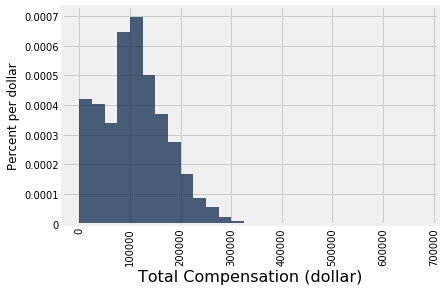

In [9]:
comp_bins = np.arange(0, 700000, 25000)
sf.hist(2, bins=comp_bins, unit='dollar')

In [21]:
sample_from_population = sf.sample(200, with_replacement=False)
sample_from_population.show(3)

Organization Group,Job,Total Compensation
Public Protection,Firefighter,"34,268"
Public Protection,Deputy Court Clerk II,"112,009"
"Public Works, Transportation & Commerce",Accountant IV,"74,401"


In [22]:
np.median(sample_from_population.column(2))

100733.815

## Aside: lists and append

In [23]:
a = make_array(2, 3, 4)
a

array([2, 3, 4])

In [24]:
np.append(a, 5)

array([2, 3, 4, 5])

In [25]:
a

array([2, 3, 4])

In [26]:
b = [2, 3, 4]
b

[2, 3, 4]

In [27]:
b.append(5)

In [28]:
b

[2, 3, 4, 5]

## Sample variability

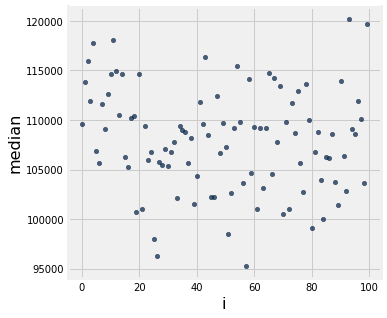

In [37]:
medians = []
repetitions = 100

for i in np.arange(repetitions):
    sample_from_population = sf.sample(200, with_replacement=False)
    medians.append(np.median(sample_from_population.column(2)))

Table().with_columns(
    'i', np.arange(100),
    'median', medians,
).scatter('i')

## Bootstrap

In [39]:
sample_from_population.show(3)

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce","Stdntdsgntrain3, Arch/Eng/Plng","19,432"
Community Health,Psychiatric Technician,"90,657"
Human Welfare & Neighborhood Development,Estate Investigator,"121,314"


In [41]:
np.median(sample_from_population.column(2))

119694.58

In [51]:
resample = sample_from_population.sample()
resample.show(3)

Organization Group,Job,Total Compensation
Public Protection,Firefighter,"209,864"
"Public Works, Transportation & Commerce",General Laborer,"64,426"
Public Protection,Police Officer 2,"123,973"


In [52]:
np.median(resample.column(2))

117782.48

What is the difference between these two?

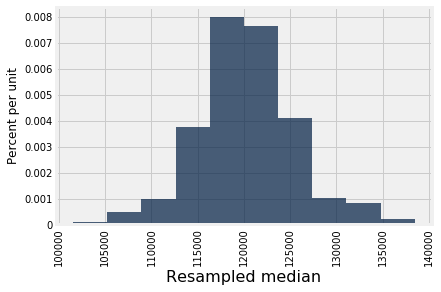

In [55]:
resampled_medians = []

for i in np.arange(1000):
    resample = sample_from_population.sample()
    median = np.median(resample.column(2))
    resampled_medians.append(median)

Table().with_column(
    "Resampled median", resampled_medians
).hist(0)

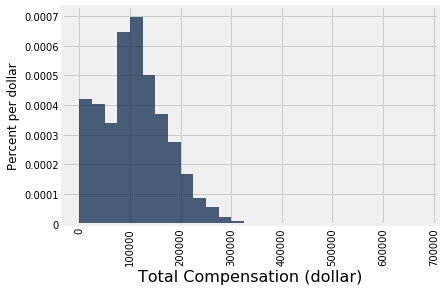

In [58]:
comp_bins = np.arange(0, 700000, 25000)
sf.hist(2, bins=comp_bins, unit='dollar')

## Confidence Intervals

In [59]:
print("95% of resampled medians were between", 
      percentile(2.5, resampled_medians),
      "and",
      percentile(97.5, resampled_medians))

95% of resampled medians were between 109744.975 and 131841.33


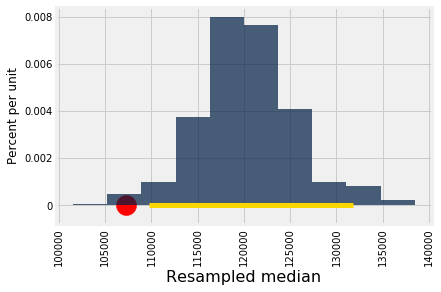

In [60]:
Table().with_column('Resampled median', resampled_medians).hist(0)

# Draw the line and dot
interval_95 = [percentile(2.5, resampled_medians),
               percentile(97.5, resampled_medians)]
plt.plot(interval_95, [0, 0], color='gold', lw=5)
pop_median = np.median(sf.column(2))
plt.scatter(pop_median, 0, color='red', s=400)

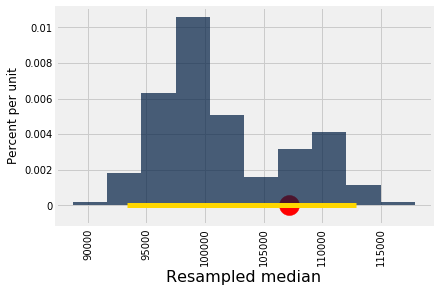

In [67]:
sample_from_population = sf.sample(200, with_replacement=False)
resample = sample_from_population.sample()

resampled_medians = []

for i in np.arange(1000):
    resample = sample_from_population.sample()
    median = np.median(resample.column(2))
    resampled_medians.append(median)

Table().with_column('Resampled median', resampled_medians).hist(0)

# Draw the line and dot
interval_95 = [percentile(2.5, resampled_medians),
               percentile(97.5, resampled_medians)]
plt.plot(interval_95, [0, 0], color='gold', lw=5)
pop_median = np.median(sf.column(2))
plt.scatter(pop_median, 0, color='red', s=400)

How often does the population median appear in my interval?